In [1]:
import matplotlib.pyplot as plt
import keras

This exercise uses the Boston Housing dataset: https://keras.io/api/datasets/boston_housing/

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

The data constains the following columns:
* CRIM:     per capita crime rate by town
* ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS:    proportion of non-retail business acres per town
* CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX:      nitric oxides concentration (parts per 10 million)
* RM:       average number of rooms per dwelling
* AGE:      proportion of owner-occupied units built prior to 1940
* DIS:      weighted distances to five Boston employment centres
* RAD:      index of accessibility to radial highways
* TAX:      full-value property-tax rate per $10,000

* PTRATIO:  pupil-teacher ratio by town
* B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT:    % lower status of the population
* MEDV:     Median value of owner-occupied homes in $1000's




In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.2, seed=113)

57026/57026 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [5]:
model = keras.Sequential(name='BostonHousingPrices')
model.add(keras.layers.Dense(100, input_dim = 13, activation='relu', name='Hidden-1'))
model.add(keras.layers.Dense(100, activation='relu', name='Hidden-2'))
model.add(keras.layers.Dense(1, activation='linear', name='Output'))

In [6]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [7]:
model.summary()

Model: "BostonHousingPrices"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 100)               1400      
                                                                 
 Hidden-2 (Dense)            (None, 100)               10100     
                                                                 
 Output (Dense)              (None, 1)                 101       
                                                                 
Total params: 11601 (45.32 KB)
Trainable params: 11601 (45.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 2s 61ms/step - loss: 611.2178 - mae: 15.9030 - val_loss: 87.3536 - val_mae: 6.1359
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 183.8536 - mae: 10.2144 - val_loss: 77.7491 - val_mae: 5.9366
Epoch 3/500
11/11 [==============================] - 0s 8ms/step - loss: 227.5107 - mae: 11.1851 - val_loss: 246.1252 - val_mae: 12.3406
Epoch 4/500
11/11 [==============================] - 0s 8ms/step - loss: 93.4186 - mae: 7.4307 - val_loss: 195.6217 - val_mae: 12.2900
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 200.5312 - mae: 11.8955 - val_loss: 386.8452 - val_mae: 17.6510
Epoch 6/500
11/11 [==============================] - 0s 8ms/step - loss: 147.9637 - mae: 10.2948 - val_loss: 476.8379 - val_mae: 19.9393
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 154.3346 - mae: 9.2087 - val_loss: 130.3548 - val_mae: 9.8124
Epoch 8/500
11/11 [=============================

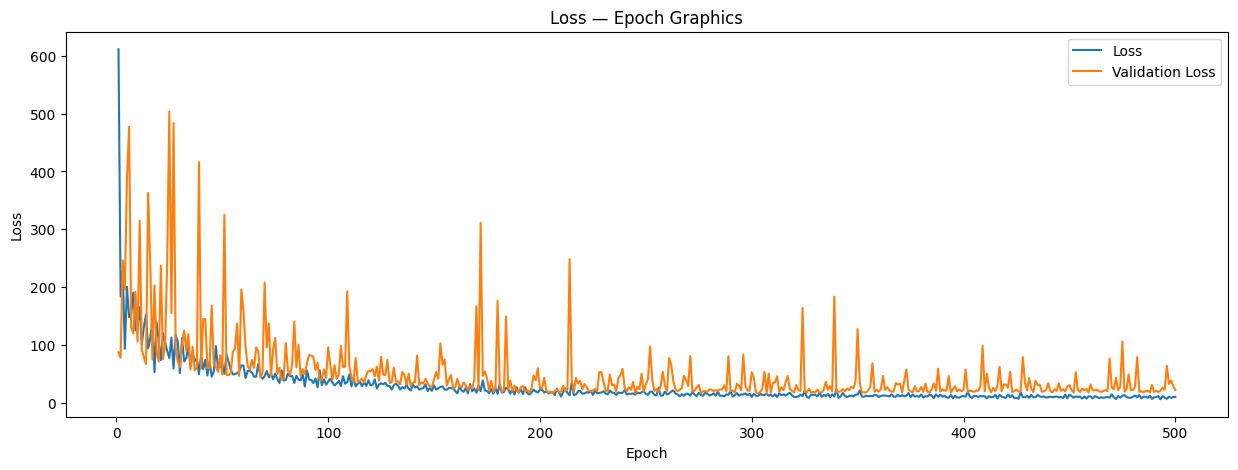

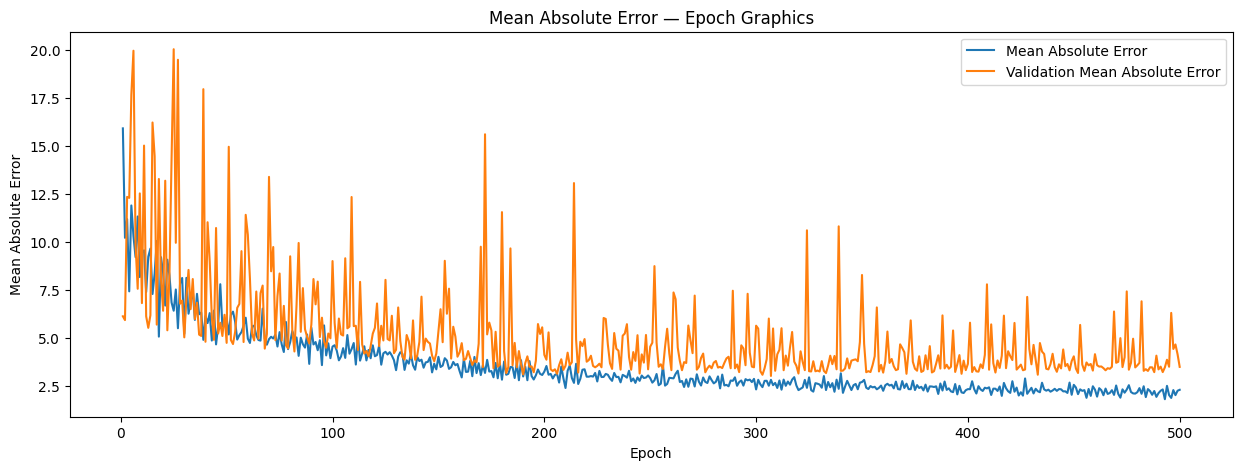

In [9]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [10]:
result = model.evaluate(X_test, y_test)
for i in range(len(result)):
    print(f'{model.metrics_names[i]} — -> {result[i]}')

4/4 [==============================] - 0s 3ms/step - loss: 29.5941 - mae: 3.3380
loss — -> 29.594079971313477
mae — -> 3.338041305541992
